In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## parmaters 1
ConsiderTC1 = 1
ConsiderMB1 = 1
informal1 = 0.11
discount1 = 0.02
scenario1 = 'val'

## parmaters 2
ConsiderTC2 = 0
ConsiderMB2 = 1
informal2 = 0.11
discount2 = 0.02
scenario2 = 'val'


In [3]:
# only keep results
df_input = pd.read_csv('results/aggregate_results_imputed.csv')
# df_input = pd.read_csv('imputation/aggregate_results_imputed.csv')

df = df_input[(df_input['discount']==discount1)&
        (df_input['ConsiderTC']==ConsiderTC1)&
        (df_input['ConsiderMB']==ConsiderMB1)&
        (df_input['informal']==informal1)&
        (df_input['discount']==discount1)&
        (df_input['scenario']==scenario1)]
df = df.reset_index().drop(columns=['index'])
df = df[df['tax'] > 0]

df2 = df_input[(df_input['discount']==discount2)&
        (df_input['ConsiderTC']==ConsiderTC2)&
        (df_input['ConsiderMB']==ConsiderMB2)&
        (df_input['informal']==informal2)&
        (df_input['discount']==discount2)&
        (df_input['scenario']==scenario2)]
df2 = df2.reset_index().drop(columns=['index'])
df2 = df2[df2['tax'] > 0]

df = df.groupby('Country Code').sum().reset_index()
df2 = df2.groupby('Country Code').sum().reset_index()

countries_info = pd.read_csv('data/dl1_countrycodeorg_country_name.csv')
countries_info = countries_info[['Country Code', 'Region', 'Income group']]
codemap = countries_info.dropna()
df = df.merge(codemap, on='Country Code')
df2 = df2.merge(codemap, on='Country Code')

print(df.head())
print(len(df))

  Country Code  ConsiderTC  ConsiderMB  informal  discount     GDPloss  \
0          AFG           1           1      0.11      0.02   22.410657   
1          AGO           1           1      0.11      0.02   35.724203   
2          ALB           1           1      0.11      0.02   16.803161   
3          AND           1           1      0.11      0.02    2.402919   
4          ARE           1           1      0.11      0.02  472.668150   

        tax       pc_loss                      Region         Income group  
0  0.012531    428.391475                  South Asia           Low income  
1  0.007213    672.841907          Sub-Saharan Africa  Lower middle income  
2  0.012591   6236.385288       Europe & Central Asia  Upper middle income  
3  0.020177  30970.229696       Europe & Central Asia          High income  
4  0.022068  44998.854065  Middle East & North Africa          High income  
199


In [4]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,0,1,0.11,0.02,20.177478,0.011282,385.703074,South Asia,Low income
1,AGO,0,1,0.11,0.02,33.877338,0.006840,638.057420,Sub-Saharan Africa,Lower middle income
2,ALB,0,1,0.11,0.02,16.330467,0.012236,6060.947687,Europe & Central Asia,Upper middle income
3,AND,0,1,0.11,0.02,2.144348,0.018006,27637.617224,Europe & Central Asia,High income
4,ARE,0,1,0.11,0.02,421.102048,0.019660,40089.668790,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,0,1,0.11,0.02,0.798930,0.020237,3437.935115,East Asia & Pacific,Lower middle income
195,YEM,0,1,0.11,0.02,22.442329,0.008515,569.880285,Middle East & North Africa,Low income
196,ZAF,0,1,0.11,0.02,223.842842,0.011371,3276.039804,Sub-Saharan Africa,Upper middle income
197,ZMB,0,1,0.11,0.02,13.093883,0.005971,466.234793,Sub-Saharan Africa,Lower middle income


In [5]:
data = df[['GDPloss','Country Code']].merge(df2[['GDPloss','Country Code']],on='Country Code')

In [6]:
data['TC'] = 1-data['GDPloss_y']/data['GDPloss_x']

In [7]:
data

,GDPloss_x,Country Code,GDPloss_y,TC
0,22.410657,AFG,20.177478,0.099648
1,35.724203,AGO,33.877338,0.051698
2,16.803161,ALB,16.330467,0.028131
3,2.402919,AND,2.144348,0.107607
4,472.668150,ARE,421.102048,0.109096
...,...,...,...,...
194,0.897256,WSM,0.798930,0.109585
195,24.793319,YEM,22.442329,0.094824
196,260.439316,ZAF,223.842842,0.140518
197,13.860056,ZMB,13.093883,0.055279


In [8]:
data[data['Country Code']=='CHN']

,GDPloss_x,Country Code,GDPloss_y,TC
34,14672.143284,CHN,12524.480898,0.146377


In [9]:
data[data['Country Code']=='USA']

,GDPloss_x,Country Code,GDPloss_y,TC
188,19973.274201,USA,16066.33092,0.195609


In [10]:
data.sort_values('TC', ascending=False)

,GDPloss_x,Country Code,GDPloss_y,TC
29,13.245099,BWA,7.620800,0.424632
52,67.289223,ECU,44.227768,0.342721
140,116.790221,PER,80.037521,0.314690
123,14.520812,MOZ,10.389505,0.284509
84,314.860000,IRQ,230.703568,0.267282
...,...,...,...,...
28,6.112155,BTN,6.045885,0.010842
138,818.419963,PAK,809.829062,0.010497
104,417.564317,LKA,413.249099,0.010334
186,23.464186,UKR,23.338792,0.005344


In [11]:
ratio = (1-df2.groupby('Income group').sum()['GDPloss']/df.groupby('Income group').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Income group,TC
0,Lower middle income,3.630034
1,Low income,7.022161
2,Upper middle income,13.479506
3,High income,15.190641


In [12]:
ratio

,Income group,TC
0,Lower middle income,3.630034
1,Low income,7.022161
2,Upper middle income,13.479506
3,High income,15.190641


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


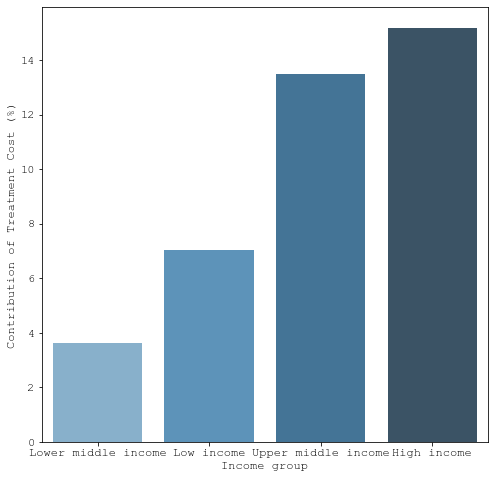

In [13]:
plt.rcParams['font.family']='Courier New, monospace'
plt.rcParams['font.size']=12
fig, ax = plt.subplots(figsize=(8,8))  # create figure & 1 axis
ax = sns.barplot("Income group", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.savefig('tables/figure_S4.pdf')

In [14]:
ratio = (1 - df2.groupby('Region').sum()['GDPloss']/df.groupby('Region').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Region,TC
0,South Asia,2.068403
1,Sub-Saharan Africa,8.791440
2,Europe & Central Asia,10.831565
3,Middle East & North Africa,12.167986
4,East Asia & Pacific,12.485765
5,Latin America & Caribbean,15.163953
6,North America,19.204106


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


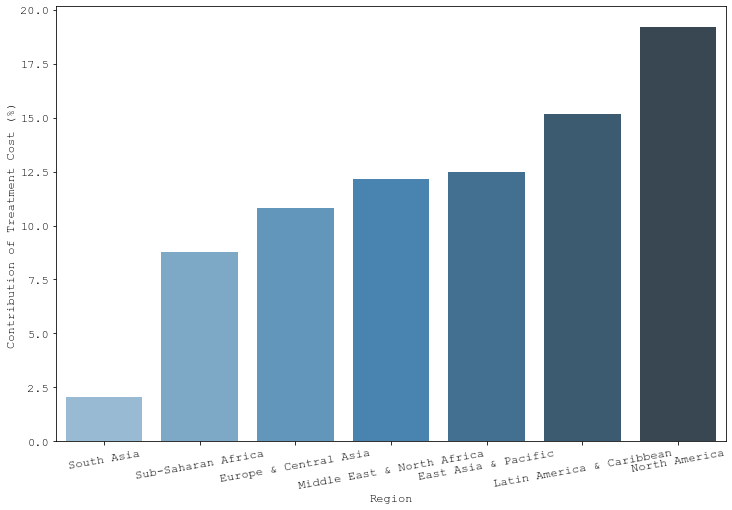

In [15]:
fig, ax = plt.subplots(figsize=(12,8))  # create figure & 1 axis
ax = sns.barplot("Region", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.xticks(rotation=10)
plt.savefig('tables/figure_S5.pdf')